In [6]:
# This tutorial is based on 
# https://mne.tools/dev/auto_tutorials/preprocessing/20_rejecting_bad_data.html

import os

import numpy as np
import mne

from jointdecorrelation import EventBasedArtifactProjector

mne.set_log_level('error')

In [7]:
# download and load the MNE sample dataset

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(
    sample_data_folder, "MEG", "sample", "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False, preload=True)

In [ ]:
# apply some basic preprocessing

raw.filter(l_freq=1, h_freq=None)
_ = raw.interpolate_bads()

In [8]:
# use MNE tools to detect EOG and ECG artifacts

eog_events = mne.preprocessing.find_eog_events(raw)
ecg_events = mne.preprocessing.find_ecg_events(raw)[0]
artifact_events = np.concatenate((eog_events, ecg_events))


onsets = artifact_events[:, 0] / raw.info["sfreq"] - 0.25
durations = [0.5] * len(artifact_events)
descriptions = ["blink"] * len(eog_events) + ["pulse"] * len(ecg_events)

# add them as annotations to the raw object
artifact_annot = mne.Annotations(
    onsets, durations, descriptions, orig_time=raw.info["meas_date"]
)
_ = raw.set_annotations(artifact_annot)

Identified artifacts. Rejecting 1 of 60 components (2%).


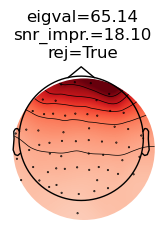

In [9]:
# use joint decorrelation to identify artifact subspaces assocaited to blink artifacts

projector = EventBasedArtifactProjector(
    'blink',
    threshold=2.,
    offset=0.,
    duration=0.5,
    picks='eeg',
)

projector.fit(raw)

_ = projector.plot()

Identified artifacts. Rejecting 1 of 60 components (2%).


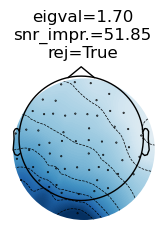

In [10]:
# use joint decorrelation to identify artifact subspaces assocaited to ECG artifacts

projector = EventBasedArtifactProjector(
    'pulse',
    threshold=1.5,
    offset=0.,
    duration=0.5,
    picks='eeg',
)

projector.fit(raw)

_ = projector.plot()